<a href="https://colab.research.google.com/github/xzdil/googlecollabprojects/blob/main/%D0%A0%D0%B0%D1%81%D0%BF%D0%BE%D0%B7%D0%BD%D0%B0%D0%B2%D0%B0%D0%BD%D0%B8%D0%B5_%D1%80%D1%83%D1%87%D0%BD%D0%BE%D0%B3%D0%BE_%D0%B2%D0%B2%D0%BE%D0%B4%D0%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Распознование ручного ввода через Pytoch и Tkinter(работает на jupiter)

In [ ]:
import torch
import torch.nn as nn 
import torchvision
import matplotlib.pyplot as plt
import torchvision.transforms as transforms

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cpu')

In [ ]:
#параметры
num_epo = 5
num_classes = 10
learning_rate = 0.001
batch_size = 50
input_size = 784
hd_layers = 100

In [ ]:
train_data = torchvision.datasets.MNIST(root="./dataset", train=True, transform=transforms.ToTensor(), download=True)
test_data = torchvision.datasets.MNIST(root="./dataset", train=False, transform=transforms.ToTensor(), download=True)

train_load = torch.utils.data.DataLoader(dataset=train_data, batch_size=batch_size, shuffle=True, num_workers=2)
test_load = torch.utils.data.DataLoader(dataset=test_data, batch_size=batch_size, shuffle=False, num_workers=2)

In [ ]:
checkdata = iter(train_load)
img, lab = next(checkdata)
print(img.shape, lab.shape)

torch.Size([50, 1, 28, 28]) torch.Size([50])


tensor(1)
tensor(5)
tensor(7)
tensor(9)
tensor(1)
tensor(6)
tensor(4)
tensor(8)
tensor(9)


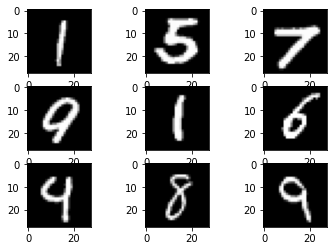

In [ ]:
for i in range(9):
    print(lab[i])
    plt.subplot(3,3,i+1)
    plt.imshow(img[i][0], cmap = "gray")
plt.show()

In [ ]:
class DigitRec(nn.Module):
    def __init__(self, input_size, hd_layers, num_classes):
        super(DigitRec,self).__init__()
        self.input = nn.Linear(in_features=input_size, out_features=hd_layers)
        self.relu1 = nn.ReLU()
        self.hd = nn.Linear(in_features=hd_layers, out_features=hd_layers)
        self.relu2 = nn.ReLU()
        self.hd2 = nn.Linear(in_features=hd_layers, out_features=hd_layers)
        self.relu3 = nn.ReLU()
        self.hd3 = nn.Linear(in_features=hd_layers, out_features=hd_layers)
        self.relu4 = nn.ReLU()
        self.out = nn.Linear(in_features=hd_layers, out_features=num_classes)
    def forward(self, x):
        model = self.input(x)
        model = self.relu1(model)
        model = self.hd(model)
        model = self.relu2(model)
        model = self.hd2(model)
        model = self.relu3(model)
        model = self.hd3(model)
        model = self.relu4(model)
        model = self.out(model)
        return model
    

In [ ]:
model = DigitRec(input_size, hd_layers, num_classes)
print(repr(model))

DigitRec(
  (input): Linear(in_features=784, out_features=100, bias=True)
  (relu1): ReLU()
  (hd): Linear(in_features=100, out_features=100, bias=True)
  (relu2): ReLU()
  (hd2): Linear(in_features=100, out_features=100, bias=True)
  (relu3): ReLU()
  (hd3): Linear(in_features=100, out_features=100, bias=True)
  (relu4): ReLU()
  (out): Linear(in_features=100, out_features=10, bias=True)
)


In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

In [ ]:
model = model.to(device)
samples = len(train_load)

In [ ]:
for epoch in range(num_epo):
    for step, (images, labels) in enumerate(train_load):
        images = images.view(-1, 28*28).to(device)
        labels = labels.to(device)
        
        outputs = model(images)
        loss = criterion(outputs, labels)
            
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        print("Epoch: {}/{}, step: {}/{}, loss: {:.3f}".format(epoch+1, num_epo, step, samples, loss.item( )))


Epoch: 1/5, step: 0/1200, loss: 2.303
Epoch: 1/5, step: 1/1200, loss: 2.286
Epoch: 1/5, step: 2/1200, loss: 2.305
Epoch: 1/5, step: 3/1200, loss: 2.304
Epoch: 1/5, step: 4/1200, loss: 2.289
Epoch: 1/5, step: 5/1200, loss: 2.327
Epoch: 1/5, step: 6/1200, loss: 2.281
Epoch: 1/5, step: 7/1200, loss: 2.289
Epoch: 1/5, step: 8/1200, loss: 2.283
Epoch: 1/5, step: 9/1200, loss: 2.273
Epoch: 1/5, step: 10/1200, loss: 2.260
Epoch: 1/5, step: 11/1200, loss: 2.239
Epoch: 1/5, step: 12/1200, loss: 2.248
Epoch: 1/5, step: 13/1200, loss: 2.232
Epoch: 1/5, step: 14/1200, loss: 2.199
Epoch: 1/5, step: 15/1200, loss: 2.238
Epoch: 1/5, step: 16/1200, loss: 2.136
Epoch: 1/5, step: 17/1200, loss: 2.156
Epoch: 1/5, step: 18/1200, loss: 2.161
Epoch: 1/5, step: 19/1200, loss: 2.122
Epoch: 1/5, step: 20/1200, loss: 2.094
Epoch: 1/5, step: 21/1200, loss: 2.013
Epoch: 1/5, step: 22/1200, loss: 2.082
Epoch: 1/5, step: 23/1200, loss: 2.087
Epoch: 1/5, step: 24/1200, loss: 1.891
Epoch: 1/5, step: 25/1200, loss: 1.

Epoch: 1/5, step: 221/1200, loss: 0.658
Epoch: 1/5, step: 222/1200, loss: 0.324
Epoch: 1/5, step: 223/1200, loss: 0.289
Epoch: 1/5, step: 224/1200, loss: 0.392
Epoch: 1/5, step: 225/1200, loss: 0.446
Epoch: 1/5, step: 226/1200, loss: 0.340
Epoch: 1/5, step: 227/1200, loss: 0.512
Epoch: 1/5, step: 228/1200, loss: 0.326
Epoch: 1/5, step: 229/1200, loss: 0.283
Epoch: 1/5, step: 230/1200, loss: 0.405
Epoch: 1/5, step: 231/1200, loss: 0.239
Epoch: 1/5, step: 232/1200, loss: 0.612
Epoch: 1/5, step: 233/1200, loss: 0.516
Epoch: 1/5, step: 234/1200, loss: 0.208
Epoch: 1/5, step: 235/1200, loss: 0.451
Epoch: 1/5, step: 236/1200, loss: 0.443
Epoch: 1/5, step: 237/1200, loss: 0.444
Epoch: 1/5, step: 238/1200, loss: 0.384
Epoch: 1/5, step: 239/1200, loss: 0.383
Epoch: 1/5, step: 240/1200, loss: 0.717
Epoch: 1/5, step: 241/1200, loss: 0.317
Epoch: 1/5, step: 242/1200, loss: 0.341
Epoch: 1/5, step: 243/1200, loss: 0.564
Epoch: 1/5, step: 244/1200, loss: 0.423
Epoch: 1/5, step: 245/1200, loss: 0.500


Epoch: 1/5, step: 430/1200, loss: 0.562
Epoch: 1/5, step: 431/1200, loss: 0.142
Epoch: 1/5, step: 432/1200, loss: 0.461
Epoch: 1/5, step: 433/1200, loss: 0.192
Epoch: 1/5, step: 434/1200, loss: 0.323
Epoch: 1/5, step: 435/1200, loss: 0.192
Epoch: 1/5, step: 436/1200, loss: 0.127
Epoch: 1/5, step: 437/1200, loss: 0.206
Epoch: 1/5, step: 438/1200, loss: 0.361
Epoch: 1/5, step: 439/1200, loss: 0.101
Epoch: 1/5, step: 440/1200, loss: 0.199
Epoch: 1/5, step: 441/1200, loss: 0.216
Epoch: 1/5, step: 442/1200, loss: 0.262
Epoch: 1/5, step: 443/1200, loss: 0.310
Epoch: 1/5, step: 444/1200, loss: 0.369
Epoch: 1/5, step: 445/1200, loss: 0.222
Epoch: 1/5, step: 446/1200, loss: 0.185
Epoch: 1/5, step: 447/1200, loss: 0.188
Epoch: 1/5, step: 448/1200, loss: 0.485
Epoch: 1/5, step: 449/1200, loss: 0.294
Epoch: 1/5, step: 450/1200, loss: 0.218
Epoch: 1/5, step: 451/1200, loss: 0.209
Epoch: 1/5, step: 452/1200, loss: 0.248
Epoch: 1/5, step: 453/1200, loss: 0.148
Epoch: 1/5, step: 454/1200, loss: 0.364


Epoch: 1/5, step: 657/1200, loss: 0.356
Epoch: 1/5, step: 658/1200, loss: 0.228
Epoch: 1/5, step: 659/1200, loss: 0.271
Epoch: 1/5, step: 660/1200, loss: 0.342
Epoch: 1/5, step: 661/1200, loss: 0.160
Epoch: 1/5, step: 662/1200, loss: 0.276
Epoch: 1/5, step: 663/1200, loss: 0.223
Epoch: 1/5, step: 664/1200, loss: 0.118
Epoch: 1/5, step: 665/1200, loss: 0.120
Epoch: 1/5, step: 666/1200, loss: 0.142
Epoch: 1/5, step: 667/1200, loss: 0.212
Epoch: 1/5, step: 668/1200, loss: 0.107
Epoch: 1/5, step: 669/1200, loss: 0.149
Epoch: 1/5, step: 670/1200, loss: 0.421
Epoch: 1/5, step: 671/1200, loss: 0.348
Epoch: 1/5, step: 672/1200, loss: 0.222
Epoch: 1/5, step: 673/1200, loss: 0.365
Epoch: 1/5, step: 674/1200, loss: 0.383
Epoch: 1/5, step: 675/1200, loss: 0.087
Epoch: 1/5, step: 676/1200, loss: 0.217
Epoch: 1/5, step: 677/1200, loss: 0.141
Epoch: 1/5, step: 678/1200, loss: 0.280
Epoch: 1/5, step: 679/1200, loss: 0.346
Epoch: 1/5, step: 680/1200, loss: 0.193
Epoch: 1/5, step: 681/1200, loss: 0.189


Epoch: 1/5, step: 878/1200, loss: 0.277
Epoch: 1/5, step: 879/1200, loss: 0.210
Epoch: 1/5, step: 880/1200, loss: 0.254
Epoch: 1/5, step: 881/1200, loss: 0.216
Epoch: 1/5, step: 882/1200, loss: 0.351
Epoch: 1/5, step: 883/1200, loss: 0.235
Epoch: 1/5, step: 884/1200, loss: 0.144
Epoch: 1/5, step: 885/1200, loss: 0.182
Epoch: 1/5, step: 886/1200, loss: 0.351
Epoch: 1/5, step: 887/1200, loss: 0.217
Epoch: 1/5, step: 888/1200, loss: 0.240
Epoch: 1/5, step: 889/1200, loss: 0.269
Epoch: 1/5, step: 890/1200, loss: 0.268
Epoch: 1/5, step: 891/1200, loss: 0.112
Epoch: 1/5, step: 892/1200, loss: 0.385
Epoch: 1/5, step: 893/1200, loss: 0.109
Epoch: 1/5, step: 894/1200, loss: 0.249
Epoch: 1/5, step: 895/1200, loss: 0.312
Epoch: 1/5, step: 896/1200, loss: 0.270
Epoch: 1/5, step: 897/1200, loss: 0.121
Epoch: 1/5, step: 898/1200, loss: 0.120
Epoch: 1/5, step: 899/1200, loss: 0.158
Epoch: 1/5, step: 900/1200, loss: 0.121
Epoch: 1/5, step: 901/1200, loss: 0.262
Epoch: 1/5, step: 902/1200, loss: 0.267


Epoch: 1/5, step: 1084/1200, loss: 0.145
Epoch: 1/5, step: 1085/1200, loss: 0.123
Epoch: 1/5, step: 1086/1200, loss: 0.438
Epoch: 1/5, step: 1087/1200, loss: 0.236
Epoch: 1/5, step: 1088/1200, loss: 0.218
Epoch: 1/5, step: 1089/1200, loss: 0.172
Epoch: 1/5, step: 1090/1200, loss: 0.083
Epoch: 1/5, step: 1091/1200, loss: 0.191
Epoch: 1/5, step: 1092/1200, loss: 0.083
Epoch: 1/5, step: 1093/1200, loss: 0.156
Epoch: 1/5, step: 1094/1200, loss: 0.182
Epoch: 1/5, step: 1095/1200, loss: 0.199
Epoch: 1/5, step: 1096/1200, loss: 0.320
Epoch: 1/5, step: 1097/1200, loss: 0.193
Epoch: 1/5, step: 1098/1200, loss: 0.174
Epoch: 1/5, step: 1099/1200, loss: 0.366
Epoch: 1/5, step: 1100/1200, loss: 0.243
Epoch: 1/5, step: 1101/1200, loss: 0.130
Epoch: 1/5, step: 1102/1200, loss: 0.361
Epoch: 1/5, step: 1103/1200, loss: 0.251
Epoch: 1/5, step: 1104/1200, loss: 0.275
Epoch: 1/5, step: 1105/1200, loss: 0.356
Epoch: 1/5, step: 1106/1200, loss: 0.373
Epoch: 1/5, step: 1107/1200, loss: 0.319
Epoch: 1/5, step

Epoch: 2/5, step: 94/1200, loss: 0.117
Epoch: 2/5, step: 95/1200, loss: 0.290
Epoch: 2/5, step: 96/1200, loss: 0.113
Epoch: 2/5, step: 97/1200, loss: 0.135
Epoch: 2/5, step: 98/1200, loss: 0.125
Epoch: 2/5, step: 99/1200, loss: 0.241
Epoch: 2/5, step: 100/1200, loss: 0.266
Epoch: 2/5, step: 101/1200, loss: 0.353
Epoch: 2/5, step: 102/1200, loss: 0.133
Epoch: 2/5, step: 103/1200, loss: 0.096
Epoch: 2/5, step: 104/1200, loss: 0.096
Epoch: 2/5, step: 105/1200, loss: 0.050
Epoch: 2/5, step: 106/1200, loss: 0.113
Epoch: 2/5, step: 107/1200, loss: 0.147
Epoch: 2/5, step: 108/1200, loss: 0.305
Epoch: 2/5, step: 109/1200, loss: 0.226
Epoch: 2/5, step: 110/1200, loss: 0.225
Epoch: 2/5, step: 111/1200, loss: 0.072
Epoch: 2/5, step: 112/1200, loss: 0.062
Epoch: 2/5, step: 113/1200, loss: 0.083
Epoch: 2/5, step: 114/1200, loss: 0.184
Epoch: 2/5, step: 115/1200, loss: 0.043
Epoch: 2/5, step: 116/1200, loss: 0.033
Epoch: 2/5, step: 117/1200, loss: 0.107
Epoch: 2/5, step: 118/1200, loss: 0.157
Epoch:

Epoch: 2/5, step: 317/1200, loss: 0.207
Epoch: 2/5, step: 318/1200, loss: 0.283
Epoch: 2/5, step: 319/1200, loss: 0.126
Epoch: 2/5, step: 320/1200, loss: 0.053
Epoch: 2/5, step: 321/1200, loss: 0.188
Epoch: 2/5, step: 322/1200, loss: 0.306
Epoch: 2/5, step: 323/1200, loss: 0.213
Epoch: 2/5, step: 324/1200, loss: 0.053
Epoch: 2/5, step: 325/1200, loss: 0.118
Epoch: 2/5, step: 326/1200, loss: 0.162
Epoch: 2/5, step: 327/1200, loss: 0.104
Epoch: 2/5, step: 328/1200, loss: 0.113
Epoch: 2/5, step: 329/1200, loss: 0.089
Epoch: 2/5, step: 330/1200, loss: 0.207
Epoch: 2/5, step: 331/1200, loss: 0.205
Epoch: 2/5, step: 332/1200, loss: 0.061
Epoch: 2/5, step: 333/1200, loss: 0.093
Epoch: 2/5, step: 334/1200, loss: 0.065
Epoch: 2/5, step: 335/1200, loss: 0.151
Epoch: 2/5, step: 336/1200, loss: 0.123
Epoch: 2/5, step: 337/1200, loss: 0.062
Epoch: 2/5, step: 338/1200, loss: 0.126
Epoch: 2/5, step: 339/1200, loss: 0.251
Epoch: 2/5, step: 340/1200, loss: 0.129
Epoch: 2/5, step: 341/1200, loss: 0.184


Epoch: 2/5, step: 528/1200, loss: 0.133
Epoch: 2/5, step: 529/1200, loss: 0.153
Epoch: 2/5, step: 530/1200, loss: 0.118
Epoch: 2/5, step: 531/1200, loss: 0.254
Epoch: 2/5, step: 532/1200, loss: 0.180
Epoch: 2/5, step: 533/1200, loss: 0.243
Epoch: 2/5, step: 534/1200, loss: 0.101
Epoch: 2/5, step: 535/1200, loss: 0.116
Epoch: 2/5, step: 536/1200, loss: 0.144
Epoch: 2/5, step: 537/1200, loss: 0.448
Epoch: 2/5, step: 538/1200, loss: 0.103
Epoch: 2/5, step: 539/1200, loss: 0.202
Epoch: 2/5, step: 540/1200, loss: 0.025
Epoch: 2/5, step: 541/1200, loss: 0.109
Epoch: 2/5, step: 542/1200, loss: 0.078
Epoch: 2/5, step: 543/1200, loss: 0.025
Epoch: 2/5, step: 544/1200, loss: 0.219
Epoch: 2/5, step: 545/1200, loss: 0.083
Epoch: 2/5, step: 546/1200, loss: 0.049
Epoch: 2/5, step: 547/1200, loss: 0.201
Epoch: 2/5, step: 548/1200, loss: 0.052
Epoch: 2/5, step: 549/1200, loss: 0.073
Epoch: 2/5, step: 550/1200, loss: 0.111
Epoch: 2/5, step: 551/1200, loss: 0.116
Epoch: 2/5, step: 552/1200, loss: 0.073


Epoch: 2/5, step: 765/1200, loss: 0.167
Epoch: 2/5, step: 766/1200, loss: 0.116
Epoch: 2/5, step: 767/1200, loss: 0.092
Epoch: 2/5, step: 768/1200, loss: 0.124
Epoch: 2/5, step: 769/1200, loss: 0.262
Epoch: 2/5, step: 770/1200, loss: 0.162
Epoch: 2/5, step: 771/1200, loss: 0.142
Epoch: 2/5, step: 772/1200, loss: 0.343
Epoch: 2/5, step: 773/1200, loss: 0.138
Epoch: 2/5, step: 774/1200, loss: 0.191
Epoch: 2/5, step: 775/1200, loss: 0.305
Epoch: 2/5, step: 776/1200, loss: 0.190
Epoch: 2/5, step: 777/1200, loss: 0.158
Epoch: 2/5, step: 778/1200, loss: 0.058
Epoch: 2/5, step: 779/1200, loss: 0.146
Epoch: 2/5, step: 780/1200, loss: 0.068
Epoch: 2/5, step: 781/1200, loss: 0.108
Epoch: 2/5, step: 782/1200, loss: 0.026
Epoch: 2/5, step: 783/1200, loss: 0.089
Epoch: 2/5, step: 784/1200, loss: 0.035
Epoch: 2/5, step: 785/1200, loss: 0.181
Epoch: 2/5, step: 786/1200, loss: 0.129
Epoch: 2/5, step: 787/1200, loss: 0.280
Epoch: 2/5, step: 788/1200, loss: 0.172
Epoch: 2/5, step: 789/1200, loss: 0.281


Epoch: 2/5, step: 985/1200, loss: 0.044
Epoch: 2/5, step: 986/1200, loss: 0.171
Epoch: 2/5, step: 987/1200, loss: 0.199
Epoch: 2/5, step: 988/1200, loss: 0.117
Epoch: 2/5, step: 989/1200, loss: 0.034
Epoch: 2/5, step: 990/1200, loss: 0.068
Epoch: 2/5, step: 991/1200, loss: 0.182
Epoch: 2/5, step: 992/1200, loss: 0.154
Epoch: 2/5, step: 993/1200, loss: 0.108
Epoch: 2/5, step: 994/1200, loss: 0.068
Epoch: 2/5, step: 995/1200, loss: 0.080
Epoch: 2/5, step: 996/1200, loss: 0.049
Epoch: 2/5, step: 997/1200, loss: 0.034
Epoch: 2/5, step: 998/1200, loss: 0.079
Epoch: 2/5, step: 999/1200, loss: 0.079
Epoch: 2/5, step: 1000/1200, loss: 0.065
Epoch: 2/5, step: 1001/1200, loss: 0.091
Epoch: 2/5, step: 1002/1200, loss: 0.231
Epoch: 2/5, step: 1003/1200, loss: 0.099
Epoch: 2/5, step: 1004/1200, loss: 0.029
Epoch: 2/5, step: 1005/1200, loss: 0.119
Epoch: 2/5, step: 1006/1200, loss: 0.077
Epoch: 2/5, step: 1007/1200, loss: 0.116
Epoch: 2/5, step: 1008/1200, loss: 0.148
Epoch: 2/5, step: 1009/1200, lo

Epoch: 2/5, step: 1192/1200, loss: 0.202
Epoch: 2/5, step: 1193/1200, loss: 0.077
Epoch: 2/5, step: 1194/1200, loss: 0.023
Epoch: 2/5, step: 1195/1200, loss: 0.198
Epoch: 2/5, step: 1196/1200, loss: 0.018
Epoch: 2/5, step: 1197/1200, loss: 0.062
Epoch: 2/5, step: 1198/1200, loss: 0.156
Epoch: 2/5, step: 1199/1200, loss: 0.174
Epoch: 3/5, step: 0/1200, loss: 0.034
Epoch: 3/5, step: 1/1200, loss: 0.039
Epoch: 3/5, step: 2/1200, loss: 0.099
Epoch: 3/5, step: 3/1200, loss: 0.026
Epoch: 3/5, step: 4/1200, loss: 0.177
Epoch: 3/5, step: 5/1200, loss: 0.069
Epoch: 3/5, step: 6/1200, loss: 0.041
Epoch: 3/5, step: 7/1200, loss: 0.117
Epoch: 3/5, step: 8/1200, loss: 0.015
Epoch: 3/5, step: 9/1200, loss: 0.087
Epoch: 3/5, step: 10/1200, loss: 0.013
Epoch: 3/5, step: 11/1200, loss: 0.024
Epoch: 3/5, step: 12/1200, loss: 0.075
Epoch: 3/5, step: 13/1200, loss: 0.013
Epoch: 3/5, step: 14/1200, loss: 0.060
Epoch: 3/5, step: 15/1200, loss: 0.061
Epoch: 3/5, step: 16/1200, loss: 0.144
Epoch: 3/5, step: 1

Epoch: 3/5, step: 224/1200, loss: 0.054
Epoch: 3/5, step: 225/1200, loss: 0.042
Epoch: 3/5, step: 226/1200, loss: 0.147
Epoch: 3/5, step: 227/1200, loss: 0.170
Epoch: 3/5, step: 228/1200, loss: 0.149
Epoch: 3/5, step: 229/1200, loss: 0.034
Epoch: 3/5, step: 230/1200, loss: 0.274
Epoch: 3/5, step: 231/1200, loss: 0.171
Epoch: 3/5, step: 232/1200, loss: 0.147
Epoch: 3/5, step: 233/1200, loss: 0.063
Epoch: 3/5, step: 234/1200, loss: 0.063
Epoch: 3/5, step: 235/1200, loss: 0.118
Epoch: 3/5, step: 236/1200, loss: 0.051
Epoch: 3/5, step: 237/1200, loss: 0.181
Epoch: 3/5, step: 238/1200, loss: 0.353
Epoch: 3/5, step: 239/1200, loss: 0.149
Epoch: 3/5, step: 240/1200, loss: 0.070
Epoch: 3/5, step: 241/1200, loss: 0.048
Epoch: 3/5, step: 242/1200, loss: 0.148
Epoch: 3/5, step: 243/1200, loss: 0.029
Epoch: 3/5, step: 244/1200, loss: 0.049
Epoch: 3/5, step: 245/1200, loss: 0.116
Epoch: 3/5, step: 246/1200, loss: 0.015
Epoch: 3/5, step: 247/1200, loss: 0.150
Epoch: 3/5, step: 248/1200, loss: 0.138


Epoch: 3/5, step: 463/1200, loss: 0.221
Epoch: 3/5, step: 464/1200, loss: 0.050
Epoch: 3/5, step: 465/1200, loss: 0.133
Epoch: 3/5, step: 466/1200, loss: 0.054
Epoch: 3/5, step: 467/1200, loss: 0.214
Epoch: 3/5, step: 468/1200, loss: 0.113
Epoch: 3/5, step: 469/1200, loss: 0.007
Epoch: 3/5, step: 470/1200, loss: 0.108
Epoch: 3/5, step: 471/1200, loss: 0.193
Epoch: 3/5, step: 472/1200, loss: 0.062
Epoch: 3/5, step: 473/1200, loss: 0.169
Epoch: 3/5, step: 474/1200, loss: 0.106
Epoch: 3/5, step: 475/1200, loss: 0.045
Epoch: 3/5, step: 476/1200, loss: 0.014
Epoch: 3/5, step: 477/1200, loss: 0.028
Epoch: 3/5, step: 478/1200, loss: 0.135
Epoch: 3/5, step: 479/1200, loss: 0.113
Epoch: 3/5, step: 480/1200, loss: 0.013
Epoch: 3/5, step: 481/1200, loss: 0.039
Epoch: 3/5, step: 482/1200, loss: 0.159
Epoch: 3/5, step: 483/1200, loss: 0.164
Epoch: 3/5, step: 484/1200, loss: 0.062
Epoch: 3/5, step: 485/1200, loss: 0.125
Epoch: 3/5, step: 486/1200, loss: 0.147
Epoch: 3/5, step: 487/1200, loss: 0.054


Epoch: 3/5, step: 684/1200, loss: 0.057
Epoch: 3/5, step: 685/1200, loss: 0.058
Epoch: 3/5, step: 686/1200, loss: 0.101
Epoch: 3/5, step: 687/1200, loss: 0.202
Epoch: 3/5, step: 688/1200, loss: 0.042
Epoch: 3/5, step: 689/1200, loss: 0.149
Epoch: 3/5, step: 690/1200, loss: 0.049
Epoch: 3/5, step: 691/1200, loss: 0.148
Epoch: 3/5, step: 692/1200, loss: 0.165
Epoch: 3/5, step: 693/1200, loss: 0.164
Epoch: 3/5, step: 694/1200, loss: 0.087
Epoch: 3/5, step: 695/1200, loss: 0.024
Epoch: 3/5, step: 696/1200, loss: 0.047
Epoch: 3/5, step: 697/1200, loss: 0.155
Epoch: 3/5, step: 698/1200, loss: 0.412
Epoch: 3/5, step: 699/1200, loss: 0.203
Epoch: 3/5, step: 700/1200, loss: 0.100
Epoch: 3/5, step: 701/1200, loss: 0.108
Epoch: 3/5, step: 702/1200, loss: 0.028
Epoch: 3/5, step: 703/1200, loss: 0.028
Epoch: 3/5, step: 704/1200, loss: 0.089
Epoch: 3/5, step: 705/1200, loss: 0.074
Epoch: 3/5, step: 706/1200, loss: 0.101
Epoch: 3/5, step: 707/1200, loss: 0.039
Epoch: 3/5, step: 708/1200, loss: 0.099


Epoch: 3/5, step: 895/1200, loss: 0.052
Epoch: 3/5, step: 896/1200, loss: 0.224
Epoch: 3/5, step: 897/1200, loss: 0.061
Epoch: 3/5, step: 898/1200, loss: 0.266
Epoch: 3/5, step: 899/1200, loss: 0.048
Epoch: 3/5, step: 900/1200, loss: 0.220
Epoch: 3/5, step: 901/1200, loss: 0.172
Epoch: 3/5, step: 902/1200, loss: 0.112
Epoch: 3/5, step: 903/1200, loss: 0.251
Epoch: 3/5, step: 904/1200, loss: 0.034
Epoch: 3/5, step: 905/1200, loss: 0.086
Epoch: 3/5, step: 906/1200, loss: 0.109
Epoch: 3/5, step: 907/1200, loss: 0.096
Epoch: 3/5, step: 908/1200, loss: 0.066
Epoch: 3/5, step: 909/1200, loss: 0.023
Epoch: 3/5, step: 910/1200, loss: 0.110
Epoch: 3/5, step: 911/1200, loss: 0.045
Epoch: 3/5, step: 912/1200, loss: 0.138
Epoch: 3/5, step: 913/1200, loss: 0.021
Epoch: 3/5, step: 914/1200, loss: 0.077
Epoch: 3/5, step: 915/1200, loss: 0.013
Epoch: 3/5, step: 916/1200, loss: 0.074
Epoch: 3/5, step: 917/1200, loss: 0.139
Epoch: 3/5, step: 918/1200, loss: 0.135
Epoch: 3/5, step: 919/1200, loss: 0.195


KeyboardInterrupt: 

In [ ]:
correct = 0
total = 0
with torch.no_grad():
    for data in test_load:
        images, labels = data
        images = images.reshape(-1, 784)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Аккуратность сети на 10000 тестовых изображений: %d %%' % (
    100 * correct / total))

Аккуратность сети на 10000 тестовых изображений: 96 %


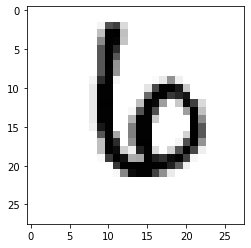

tensor([6.0307e-06, 1.0544e-04, 1.0509e-05, 2.9948e-08, 7.6710e-06, 4.5789e-05,
        9.9980e-01, 3.2396e-08, 2.0616e-05, 2.1362e-09],
       grad_fn=<SoftmaxBackward0>)

Это 6
Вероятность  99.98


In [ ]:
import random
i = random.randint(1,27)
img = img.reshape(-1, 28, 28)
plt.imshow(img[i], cmap = plt.cm.binary)
plt.show()
img = img.reshape(-1, 784)
a = torch.softmax(model(img[i]), dim=0)
mxa = max(a).item()
print(a)
print('')
print("Это", torch.argmax(model(img[i])).item())
print(f"Вероятность  {mxa*100:.2f}")

In [ ]:
from tkinter import *
import tkinter as tk
import win32gui
from PIL import ImageGrab, Image, ImageOps
import numpy as np
T = torchvision.transforms.Compose([
    torchvision.transforms.ToTensor()
])

Prediction is 0
Prediction is 1
Prediction is 1
Prediction is 7


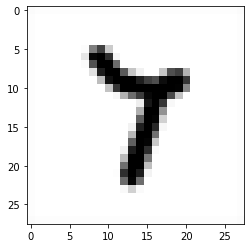

In [ ]:
def inference(imp, model, device):
    imp = imp.convert(mode="L")
    x = imp.resize((28, 28))
    x = ImageOps.invert(x)
    plt.imshow(x, cmap=plt.cm.binary)
    x = np.array(x).reshape(-1,784)
    with torch.no_grad():
        pred = model(T(x).float().to(device))
        return torch.softmax(pred, dim = -1).cpu().numpy()
class App(tk.Tk):
    def __init__(self):
        tk.Tk.__init__(self)
        
        self.x = self.y = 0
        
        # Создание элементов
        self.canvas = tk.Canvas(self, width=300, height=300, bg = "white", cursor="cross")
        self.label = tk.Label(self, text="Думаю..", font=("Helvetica", 48))
        self.classify_btn = tk.Button(self, text = "Распознать", command = self.classify_handwriting) 
        self.button_clear = tk.Button(self, text = "Очистить", command = self.clear_all)
        
        # Сетка окна
        self.canvas.grid(row=0, column=0, pady=2, sticky=W, )
        self.label.grid(row=0, column=1,pady=2, padx=2)
        self.classify_btn.grid(row=1, column=1, pady=2, padx=2)
        self.button_clear.grid(row=1, column=0, pady=2)
        
        # self.canvas.bind("<Motion>", self.start_pos)
        self.canvas.bind("<B1-Motion>", self.draw_lines)
        
    def clear_all(self):
        self.canvas.delete("all")
        
    def classify_handwriting(self):
        HWND = self.canvas.winfo_id() 
        rect = win32gui.GetWindowRect(HWND) # получаем координату холста
        im = ImageGrab.grab(rect)
        pred = inference(im, model, device)
        pred_idx = np.argmax(pred)
        print("Prediction is " + str(pred_idx))
        self.label.configure(text= str(pred_idx)+', '+'%')
        
    def draw_lines(self, event):
        self.x = event.x
        self.y = event.y
        r=14
        self.canvas.create_oval(self.x-r, self.y-r, self.x + r, self.y + r, fill='black')


app = App()
mainloop()